#### 911 Call Data Analysis

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [87]:
df = pd.read_csv('911.csv')
df.isnull().sum()

lat              0
lng              0
desc             0
zip          32494
title            0
timeStamp        0
twp             95
addr             0
e                0
dtype: int64

In [88]:
df_wrang_zip = df[pd.notnull(df['zip'])]
df_wrang_zip.isnull().sum()

lat           0
lng           0
desc          0
zip           0
title         0
timeStamp     0
twp          42
addr          0
e             0
dtype: int64

In [89]:
df_wrang = df_wrang_zip[pd.notnull(df_wrang_zip['twp'])]
df_wrang.isnull().sum()

lat          0
lng          0
desc         0
zip          0
title        0
timeStamp    0
twp          0
addr         0
e            0
dtype: int64

• Compute - What are the top 10 Zipcodes for 911 and Question 1: Are Zipcodes
19446 and 19090 presents?

In [90]:
# top10s = df_wrang.groupby('zip')['zip'].count().nlargest(10)
# top10s

df_wrang['zip'].value_counts().head(10)

19401.0    18395
19464.0    17935
19403.0    13366
19446.0    12828
19406.0     8817
19002.0     8366
19468.0     7859
19046.0     7340
19454.0     7274
19090.0     6998
Name: zip, dtype: int64

• Compute - What are the top 4 townships (twp) for 911 calls and Question 2: Which
ofthe following township are not present? -- LOWER POTTSGROVE, NORRISTOWN,
HORSHAM, ABINGTON


In [91]:
df_wrang['twp'].value_counts().head(4)

LOWER MERION    19442
ABINGTON        15635
NORRISTOWN      14685
POTTSTOWN       10971
Name: twp, dtype: int64

• Compute - Create new features and Question 3: What is the most common reason for
911 calls based on the Reason Column? Which comes second


In [92]:
df_wrang["Reason"] = df_wrang['title'].apply(lambda val: val.split(':')[0])
df_wrang["Dept"]   = df_wrang['title'].apply(lambda val: val.split(':')[1])


• Compute - Plot barchart using matplot for 911 calls by Reason and Question 4: How
canyou plot the bars horizontally?


<AxesSubplot: xlabel='Reason', ylabel='count'>

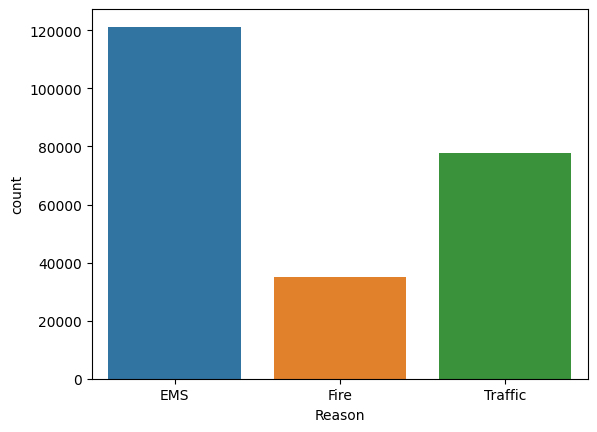

In [93]:
# df_wrang["Reason"].value_counts()
sns.countplot(x=df_wrang["Reason"])

In [94]:
df_wrang['Dept'].value_counts().head(5)

 VEHICLE ACCIDENT -       53086
 DISABLED VEHICLE -       14775
 FIRE ALARM               14250
 RESPIRATORY EMERGENCY    12719
 FALL VICTIM              12629
Name: Dept, dtype: int64

<AxesSubplot: ylabel='Dept'>

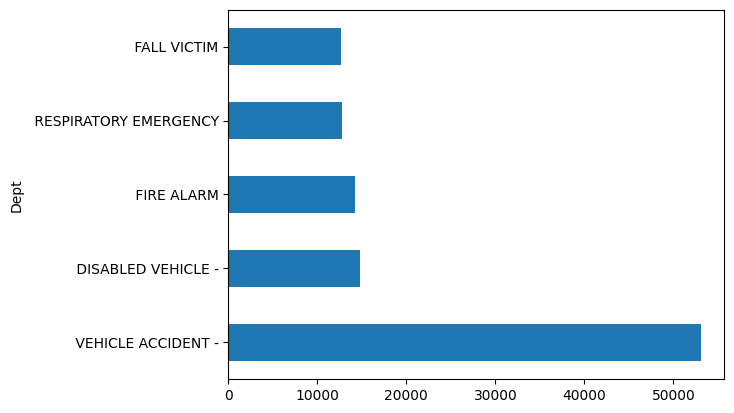

In [95]:
df_wrang.groupby('Dept').count().sort_values('e', ascending=0)[:5]['e'].plot(kind='barh')

<AxesSubplot: ylabel='twp'>

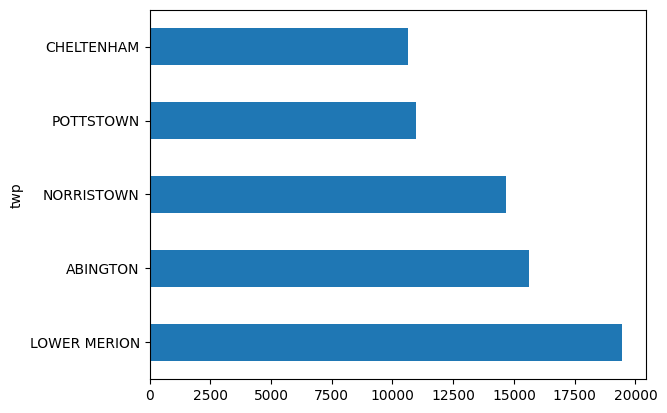

In [96]:
df_wrang.groupby('twp').count().sort_values('e',ascending=0)[:5]['e'].plot(kind='barh')

• Do data manipulation and Question 5: Which day got maximum calls for EMS andHow many?


In [97]:
df_wrang['timeStamp'] = pd.to_datetime(df_wrang['timeStamp'])
df_wrang['day']       = df_wrang['timeStamp'].dt.day_name()
df_wrang['month']     = df_wrang['timeStamp'].dt.month_name()
dayMax                = df_wrang[df_wrang['Reason']=='EMS']

### Print
dayMax['day'].value_counts().head(1)



Friday    18038
Name: day, dtype: int64

• Compute - Create a countplot of the Day of Week column with the hue based on the
Reason column and Question 6: On which day traffic calls were lowest?


<AxesSubplot: xlabel='day', ylabel='count'>

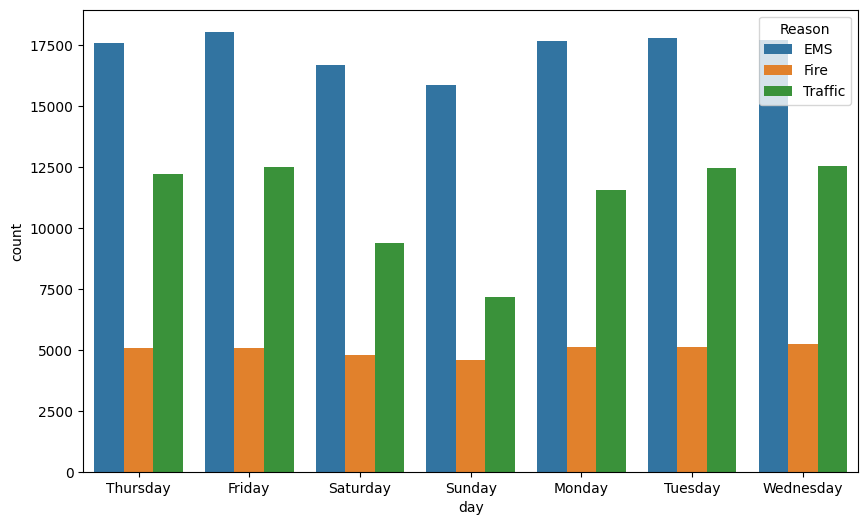

In [98]:
plt.figure(figsize=(10,6))
sns.countplot(x='day',data=df_wrang, hue='Reason')

• Compute - Create a countplot month-wise -- Question 7: Which month saw the
highestcalls for fire?


<AxesSubplot: xlabel='month', ylabel='count'>

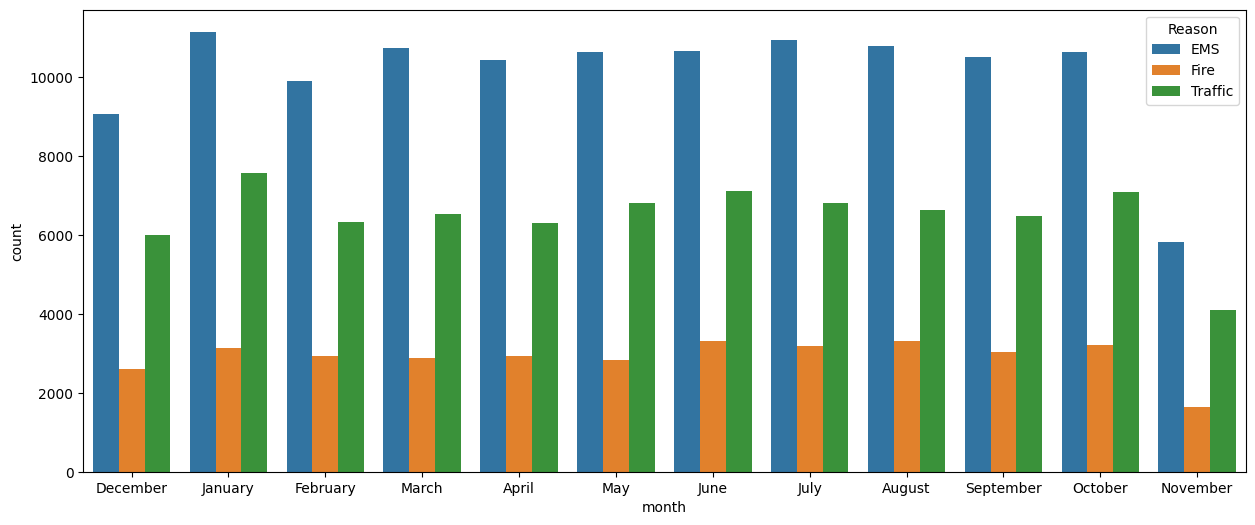

In [101]:
plt.figure(figsize=(15,6))
sns.countplot(x='month',data=df_wrang, hue='Reason')

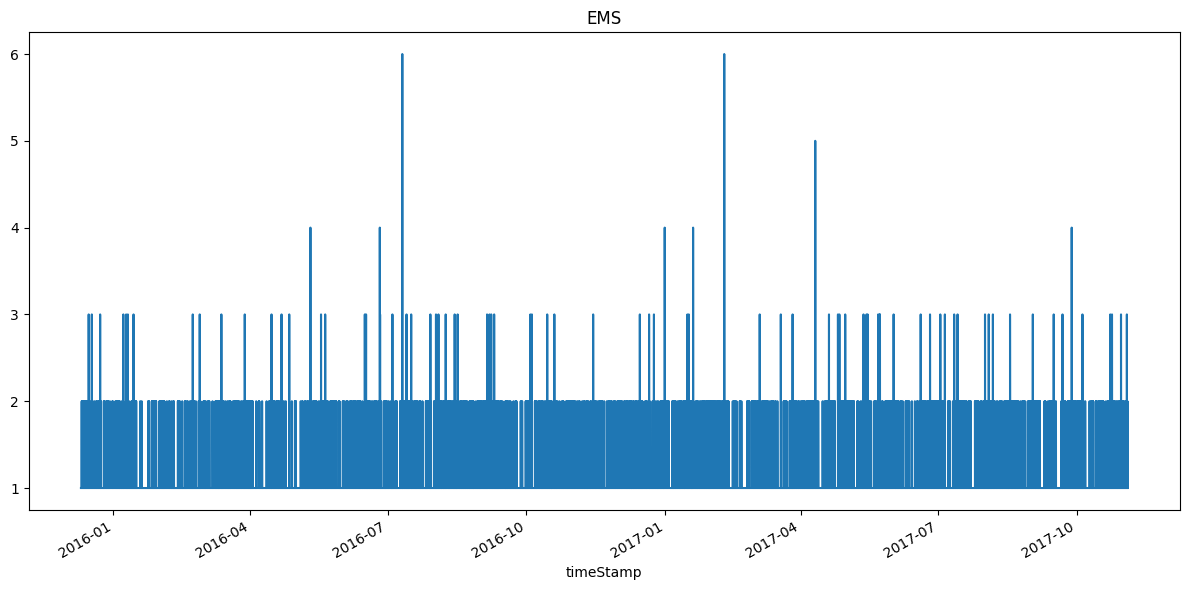

In [104]:
df_wrang[df_wrang['Reason']=='EMS'].groupby('timeStamp').count()['twp'].plot(figsize=(12,6))
plt.title('EMS')
plt.tight_layout()

• Compute - Create Web Map for Traffic Calls and Question 8: Why do some areas
seem tohave lower or almost zero traffic calls? Hint: Zoom the map